In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(market_data_df)

In [5]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# copy & Set the coinid column as index
scaled_df.index = market_data_df.index

# Display sample data
display(scaled_df.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k)

# 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_df)

# 3. Append the model.inertia_ to the inertia list

    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
display(elbow_df)


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.897940
3,4,79.022435
4,5,72.422166
5,6,59.617721
6,7,49.505991
7,8,43.970619
8,9,33.425709
9,10,29.772433


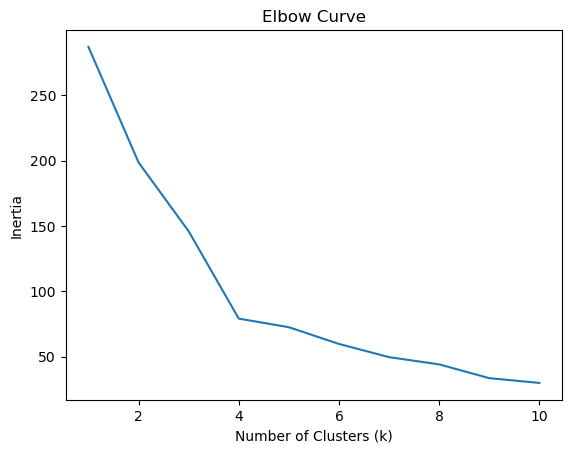

In [7]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Based on the graph it is between 4 or 5 , as after that it seems to be flattening out

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [8]:
# Initialize the K-Means model using the best value for k
best_k = 4   # based on the Elbow curve analysis
kmeans = KMeans(n_clusters=best_k)

In [9]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_df)


KMeans(n_clusters=4)

In [10]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans.predict(scaled_df)


# View the resulting array of cluster values.
print(cluster_labels)


[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [11]:
# Create a copy of the DataFrame
market_data_copy = market_data_df.copy()


In [12]:
# Add a new column to the DataFrame with the predicted clusters
market_data_copy['cluster'] = cluster_labels


# Display sample data
display(market_data_copy.head())


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,3
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,3
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,3


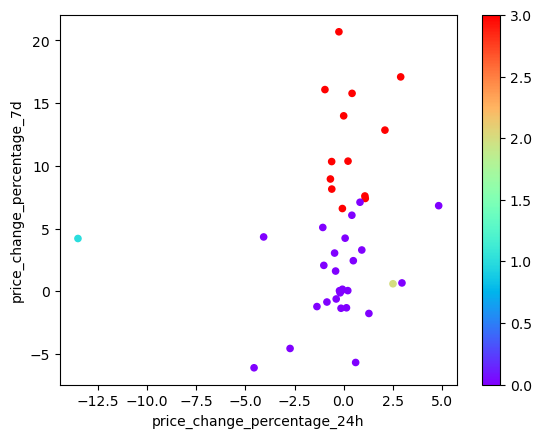

In [13]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

market_data_copy.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c=market_data_copy['cluster'],
    cmap='rainbow'
)
plt.show()



### Optimize Clusters with Principal Component Analysis.

In [14]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [15]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_df)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# View the first five rows of the DataFrame. 
pca_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [16]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

display(explained_variance)


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.6 + 0.3 + 0.1 = 0.99
So, the three principal components together explain 99% of the total variance in the data.This means that the three principal components capture almost all the information in the data, and the remaining components (if there are any) would explain only a tiny fraction of the variance.

In [19]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])


# Copy the crypto names from the original data
#pca_df['coin_id'] = market_data_copy['coin_id']
pca_df.index = market_data_copy.index


# Set the coinid column as index
#pca_df.set_index('coin_id', inplace=True)


# Display sample data
display(pca_df.head())


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [20]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
for k in k_values:

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)

# 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k_values': k_values, 'inertia_values': inertia_values}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)


   k_values  inertia_values
0         1      256.874086
1         2      168.811896
2         3      115.918077
3         4       49.665497
4         5       55.325182
5         6       27.866859
6         7       29.451378
7         8       17.283220
8         9       15.221520
9        10       10.543635


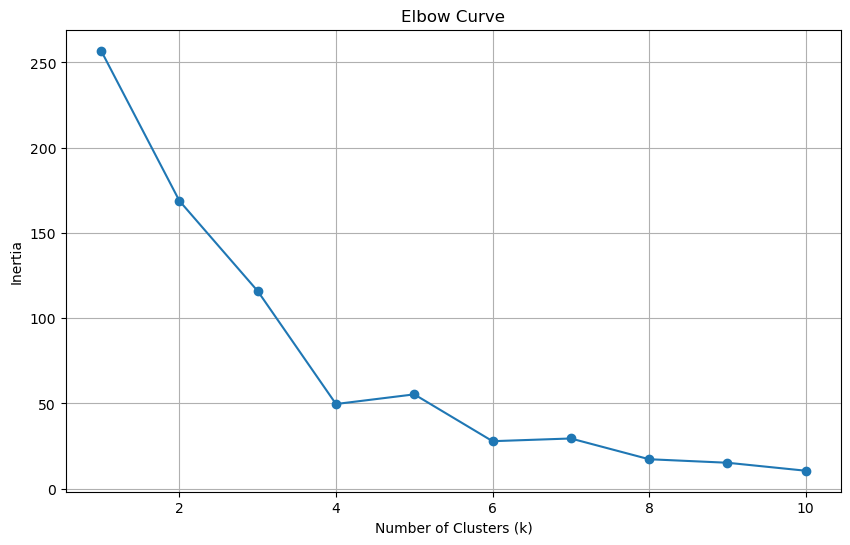

In [21]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k_values'], elbow_df['inertia_values'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k when using the PCA data is k=3.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes, it differs from the best k value found using the original data. The best k value found using the original data was k=5. The PCA transformation has changed the structure of the data, and now k=3 is the optimal number of clusters.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [22]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3, random_state=42)


In [26]:
# Fit the K-Means model using the PCA data
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=42)

In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data

predictions = kmeans.predict(pca_df)

# Print the resulting array of cluster values.
display(predictions)

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [28]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['cluster'] = predictions


# Display sample data
display(pca_df_copy.head())


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [30]:
import hvplot.pandas

# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_df_copy.hvplot.scatter(x="PC1", y="PC2", c="cluster", cmap="Category10")

#Each cluster is represented by a different color, and the points are scattered in a way that reveals the relationships between the cryptocurrencies in the reduced two-dimensional space.

:Scatter   [PC1]   (PC2,cluster)

### Determine the Weights of Each Feature on each Principal Component

In [36]:
# Use the columns from the original scaled DataFrame as the index.
#scaled_data = scaler.fit_transform(market_data_df)
pca_df_copy.index=scaled_df.index



Component 1:
[-0.41672777 -0.10243154 -0.0091623   0.1915226   0.32036496  0.59446798
  0.56837928]
Component 2:
[ 0.35816187  0.22743192  0.54041516  0.56218228  0.43403994  0.02773475
 -0.15078941]
Component 3:
[-0.21879492  0.7876703   0.34953356 -0.18174374 -0.36137707  0.03973325
  0.21054134]


In [37]:
# Get the component loadings
loadings = pca.components_

# Print the loadings for each component
for i, component in enumerate(loadings):
    print(f"Component {i+1}:")
    print(component)

Component 1:
[-0.41672777 -0.10243154 -0.0091623   0.1915226   0.32036496  0.59446798
  0.56837928]
Component 2:
[ 0.35816187  0.22743192  0.54041516  0.56218228  0.43403994  0.02773475
 -0.15078941]
Component 3:
[-0.21879492  0.7876703   0.34953356 -0.18174374 -0.36137707  0.03973325
  0.21054134]


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The features with the largest absolute values both postive and negative have influence. In the above case, for Component 3 0.7876703 has strongly positively correlated with the component and for the component 1 the loading is -0.41672777 is the feature which is strongly negatively correlated with the component.
    